# SiMCosta Project

## Checking the Data of the Buoy SC-1

We get access of a various datasets with diferent parameters from 2017 with the extension `.mat`

### Exploring the Data

**Steps:**
1. Open the `.mat` file
2. Create only one dataframe with all the data

In [1]:
from pathlib import Path


datadir = Path("0-data/00-data")

In [2]:
from scipy.io import loadmat
import janitor
import pandas as pd


def load_file(fname):
    return loadmat(fname)


def clean_datastruc(data):
    d = {}
    for rec, values in data.items():
        if not rec.startswith("__"):
            d .update({rec: values.squeeze()})
    return pd.DataFrame.from_dict(d)


def clean_series(df):
    df = df.clean_names(case_type="lower").convert_matlab_date("datenum")
    df = df.set_index("datenum")
    df.index.name = "datetime"
    return df["values_good"]


def variable_name(fname):
    return fname.stem.lower().strip("sc1_").replace("wqmx", "water").replace("atm_atm", "atm")

In [3]:
series = {}


for fname in datadir.glob("*.mat"):
    data = load_file(fname)
    s = clean_datastruc(data)
    s = clean_series(s)
    series.update({variable_name(fname): s})


df = pd.DataFrame(series)
df

,water_do,water_salinity,atm_avg_wnd_spd,water_chla,water_temperature,atm_avg_radiation,atm_precipitation,atm_avg_pre,atm_avg_humidity,atm_co2,atph_ph,atm_avg_wnd_dir
datetime,,,,,,,,,,,,
2017-02-22 12:00:00.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-22 12:59:59.999997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-22 14:00:00.000003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-22 15:00:00.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-22 15:59:59.999997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-18 08:03:00.000003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-18 09:02:59.999999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-18 10:02:59.999996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#save the dataframe with all the data

df.to_csv('0-data/simcosta_buoySC-1_2017.csv') 

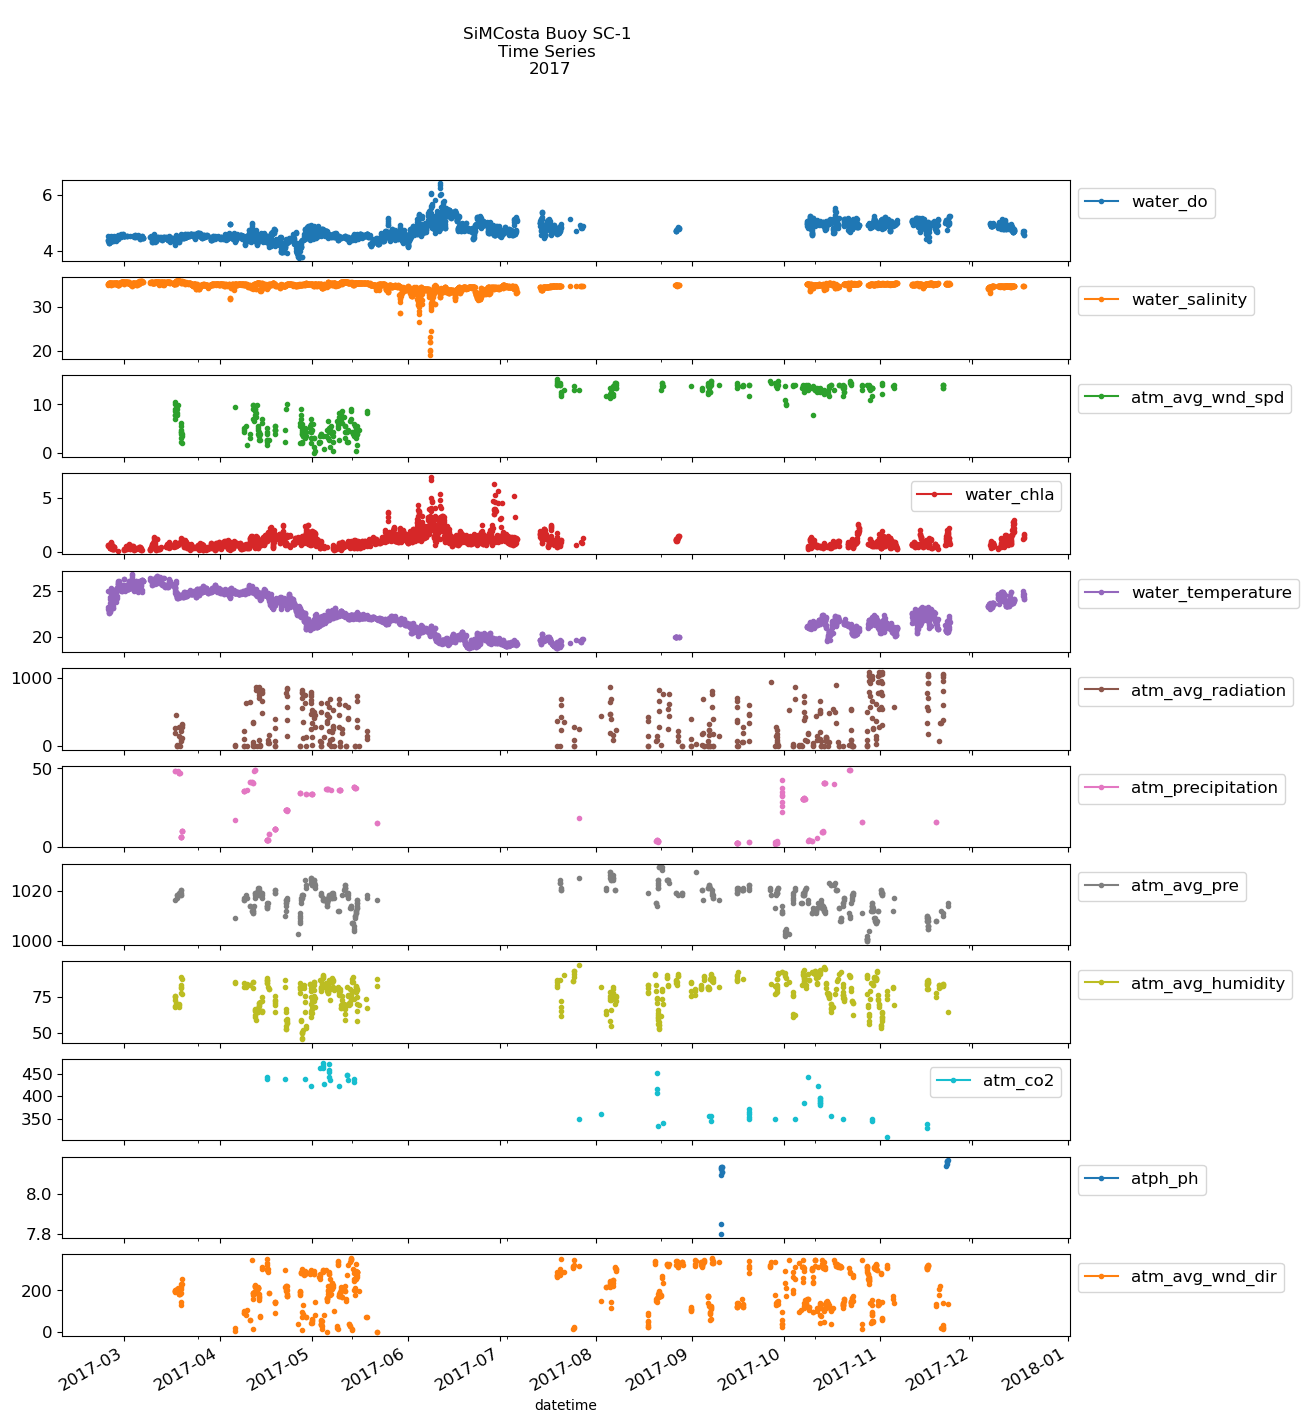

In [5]:
axes = df.plot(
    subplots=True,
    layout=(12, 1),
    figsize=(13, 17),
    marker=".",
    fontsize = 12,
    title = '\nSiMCosta Buoy SC-1 \nTime Series \n2017'
)

[ax.legend(bbox_to_anchor=(1,1), fontsize = 12) for ax in axes.ravel()];

### Selecting and Cleaning the Data

**Steps:**
1. Create a new df with the period and parameters selected
2. Clean the dataframe

In [6]:
df_period = df['2017-03' :'2017-06']

df_final= df_period[['water_temperature', 'water_salinity', 'water_do', 'water_chla']]

df_final

,water_temperature,water_salinity,water_do,water_chla
datetime,,,,
2017-03-01 00:00:00.000000,25.116658,35.706474,NaN,NaN
2017-03-01 00:02:59.999999,NaN,NaN,NaN,NaN
2017-03-01 00:59:59.999997,25.086663,35.709158,4.516789,NaN
2017-03-01 01:02:59.999996,NaN,NaN,NaN,NaN
2017-03-01 02:00:00.000003,25.023489,35.701737,4.515000,NaN
...,...,...,...,...
2017-06-30 21:02:59.999999,NaN,NaN,NaN,NaN
2017-06-30 21:59:59.999997,19.447205,34.493450,4.563800,3.06310
2017-06-30 22:02:59.999996,NaN,NaN,NaN,NaN


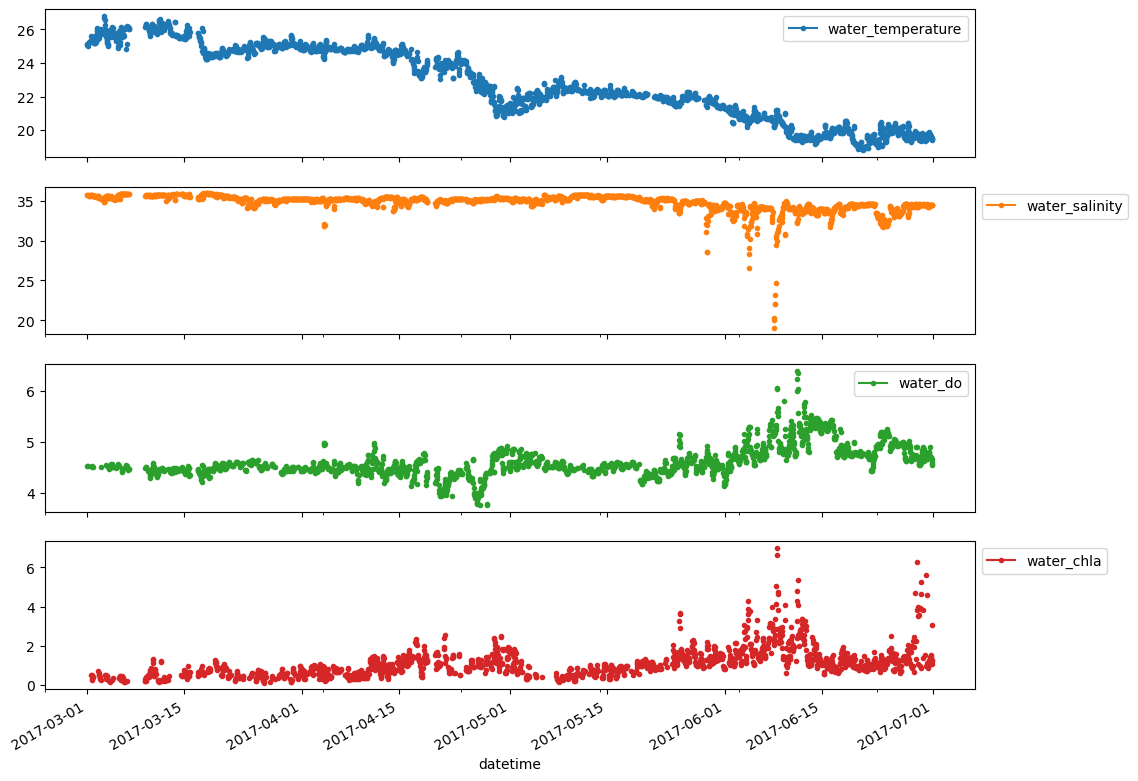

In [7]:
# Time series from the period of march to june 2017

axes = df_final.plot(
    subplots=True,
    layout=(4, 1),
    figsize=(12, 10),
    marker="."
)

[ax.legend(bbox_to_anchor=(1, 1)) for ax in axes.ravel()];

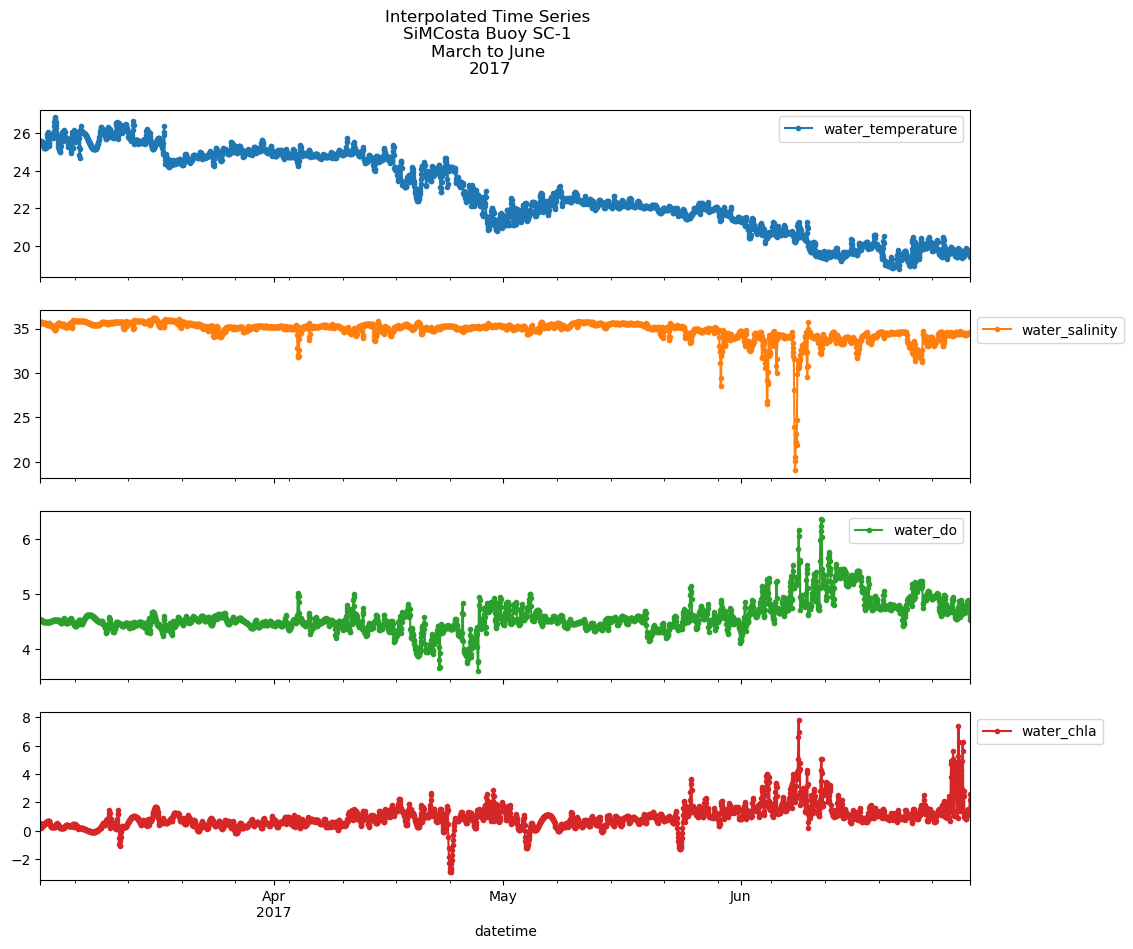

In [11]:
#Cleaning the data by interpolate

df_interpolate = df_final.resample('1H').mean().interpolate(method = 'cubic')

df_interpolate = df_interpolate.dropna()

# Saving the dataframe

df_interpolate.to_csv('0-data/simcosta_buoySC-1_marchtojune_2017.csv')

# Graphics with interpolated data

axes = df_interpolate.plot(
    subplots=True,
    layout=(4, 1),
    figsize=(12, 10),
    marker=".",
    title = 'Interpolated Time Series \nSiMCosta Buoy SC-1 \nMarch to June \n2017'
)

[ax.legend(bbox_to_anchor=(1, 1)) for ax in axes.ravel()];